# Analyze insurance claims

Steps we are going to follow:
    
1. Data Exploration.
2. Data cleaning and imputation.
3. Prediction.
4. Conclusion.

Let's use the brvehins2.csv data set as it might allow us to get more information from the brazil_geodata.csv file easier than the brvehins1.csv data set.

**1.Data Exploration**

Let's check out the dataset first to see what kind of features we have.

In [1]:
#let's supress warnings for ease of reading
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
data = pd.read_csv('brvehins2.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2667752 entries, 0 to 2667751
Data columns (total 18 columns):
VehYear             float64
VehModel            object
VehGroup            object
City                object
CityCode            float64
Area                object
State               object
StateAb             object
ExposTotal          float64
PremTotal           float64
ClaimNbRob          int64
ClaimNbColl         int64
ClaimNbFire         int64
ClaimNbOther        int64
ClaimAmountRob      float64
ClaimAmountColl     float64
ClaimAmountFire     int64
ClaimAmountOther    int64
dtypes: float64(6), int64(6), object(6)
memory usage: 366.4+ MB


It looks like the data is a mixture of numeric and object values. First, we need to impute missing values, clean the data, and convert all the features to numeric. 

**2.Data Cleaning and Imputation. **

Let's start by replacing empty cells with na which will make it easier to check which features have missing data and to drop them if there is too much data missing.

In [2]:
import numpy as np
data.replace(r'^\s*$', np.nan, regex=True, inplace = True)

In [3]:
data.head()

,VehYear,VehModel,VehGroup,City,CityCode,Area,State,StateAb,ExposTotal,PremTotal,ClaimNbRob,ClaimNbColl,ClaimNbFire,ClaimNbOther,ClaimAmountRob,ClaimAmountColl,ClaimAmountFire,ClaimAmountOther
0,2011.0,Ford - Fiesta 1.0 8v Flex 5p,Ford Fiesta 1.0,Ipeuna,352110.0,Ribeirao Preto e Demais Mun. de Campinas,Sao Paulo,SP,0.51,383.40,0,0,0,0,0.0,0.0,0,0
1,2003.0,Gm - Chevrolet - S10 P-up 2.8/sert. 2.8 4x4 Tb...,Gm Chevrolet S-10,Monte Alto,353130.0,Ribeirao Preto e Demais Mun. de Campinas,Sao Paulo,SP,0.50,818.95,0,0,0,0,0.0,0.0,0,0
2,1998.0,Gm - Chevrolet - Corsa Wagon Gls 1.6 16v Mpfi 4p,Gm Chevrolet Corsa Acima De 1.0,Ribeirao Das Neves (ver Cep Por Logradouros),NaN,Met.BH-Centro Oeste-Zona Mata-C. Vertentes,Minas Gerais,MG,0.17,175.05,0,0,0,0,0.0,0.0,0,0
3,1982.0,Mercedes-benz - L-1113 2p (diesel),Mercedes-benz Caminhoes - Outros,Imbuia,420740.0,Blumenau e demais regioes,Santa Catarina,SC,0.20,44.26,0,0,0,0,0.0,0.0,0,0
4,2009.0,Honda - Cg 125 Fan / Fan Ks,Honda Motos Ate 450cc,Sao Jose,421660.0,Met. Florianopolis e Sul,Santa Catarina,SC,2.18,779.90,0,0,0,0,0.0,0.0,0,0


Imputation of Na in empty cells seems to have worked. Let's check the number of missing cells for each column.

In [4]:
for colname in data.keys():
    print(colname)
    print(data[colname].isnull().sum())

VehYear
4
VehModel
142559
VehGroup
142559
City
2104
CityCode
991869
Area
0
State
0
StateAb
0
ExposTotal
0
PremTotal
0
ClaimNbRob
0
ClaimNbColl
0
ClaimNbFire
0
ClaimNbOther
0
ClaimAmountRob
0
ClaimAmountColl
0
ClaimAmountFire
0
ClaimAmountOther
0


It looks like VehModel, VehGroup, City and CityCode have a lot of null values but none of the have more than 50% null values. Hence, it is worth trying to impute the missing values. 

CityCode is easy to impute from brazil_geodata.csv but once we have the city names, city code is not so important as they represent the same information. Hence we can drop CityCode column. 

Let's make a copy of the original data before we start data engineering to save the original data.

In [5]:
clean_data = data.copy()

In [6]:
#drop CityCode
clean_data = data.drop(['CityCode'],axis=1)

There are only 4 missing values for VehYear. Let's just impute the most common vehicle year for those.

In [7]:
freqVehYear = clean_data.dropna(subset=['VehYear'],axis=0,inplace=False)['VehYear'].value_counts().idxmax()
clean_data.set_value(clean_data['VehYear'].isnull(),'VehYear',freqVehYear)\

,VehYear,VehModel,VehGroup,City,Area,State,StateAb,ExposTotal,PremTotal,ClaimNbRob,ClaimNbColl,ClaimNbFire,ClaimNbOther,ClaimAmountRob,ClaimAmountColl,ClaimAmountFire,ClaimAmountOther
0,2011.0,Ford - Fiesta 1.0 8v Flex 5p,Ford Fiesta 1.0,Ipeuna,Ribeirao Preto e Demais Mun. de Campinas,Sao Paulo,SP,0.51,383.40,0,0,0,0,0.0,0.0,0,0
1,2003.0,Gm - Chevrolet - S10 P-up 2.8/sert. 2.8 4x4 Tb...,Gm Chevrolet S-10,Monte Alto,Ribeirao Preto e Demais Mun. de Campinas,Sao Paulo,SP,0.50,818.95,0,0,0,0,0.0,0.0,0,0
2,1998.0,Gm - Chevrolet - Corsa Wagon Gls 1.6 16v Mpfi 4p,Gm Chevrolet Corsa Acima De 1.0,Ribeirao Das Neves (ver Cep Por Logradouros),Met.BH-Centro Oeste-Zona Mata-C. Vertentes,Minas Gerais,MG,0.17,175.05,0,0,0,0,0.0,0.0,0,0
3,1982.0,Mercedes-benz - L-1113 2p (diesel),Mercedes-benz Caminhoes - Outros,Imbuia,Blumenau e demais regioes,Santa Catarina,SC,0.20,44.26,0,0,0,0,0.0,0.0,0,0
4,2009.0,Honda - Cg 125 Fan / Fan Ks,Honda Motos Ate 450cc,Sao Jose,Met. Florianopolis e Sul,Santa Catarina,SC,2.18,779.90,0,0,0,0,0.0,0.0,0,0
5,2004.0,Gm - Chevrolet - Meriva 1.8/ Cd 1.8 Mpfi 8v 10...,Gm Chevrolet Meriva,Imbe,Demais regioes,Rio Grande do Sul,RS,0.50,188.02,0,0,0,0,0.0,0.0,0,0
6,2011.0,Peugeot - 207 Xs 1.6 Flex 16v 5p,Peugeot 207,Mato Grosso,Mato Grosso,Mato Grosso,MT,2.27,2927.01,0,0,0,0,0.0,0.0,0,0
7,2008.0,Volkswagen - 24-250 E Constellation 3-eixos 2p...,Volkswagen Caminhoes - Todos,Cianorte,Demais regioes,Parana,PR,0.52,4508.79,0,0,0,0,0.0,0.0,0,0
8,2006.0,Toyota - Corolla Xei 1.8/1.8 Flex 16v Aut.,Toyota Corolla,Sapucaia Do Sul,Met. Porto Alegre e Caxias do Sul,Rio Grande do Sul,RS,0.50,972.78,0,0,0,0,0.0,0.0,0,0
9,2003.0,Gm - Chevrolet - Corsa Sedan 1.8 Mpfi 8v 102c...,Gm Chevrolet Corsa Acima De 1.0,Saquarema,Interior,Rio de Janeiro,RJ,0.23,411.46,0,0,0,0,0.0,0.0,0,0


Let's impute the most populous city in the state for missing city values.

In [8]:
geo_data = pd.read_csv('brazil_geodata.csv')
#find the indexes of cities with max density per state in brazil_geodata
densIndx=geo_data.groupby(['State'])['CityDens10'].idxmax()
#find the indexes of null city values in clean_data
nullIdxs = clean_data[clean_data['City'].isnull()].index

#impute the city with largest population 
for i in nullIdxs:
    clean_data.set_value(i,'City',geo_data.get_value(densIndx[clean_data.get_value(i,'State')],'City'))

In [9]:
clean_data['City'].isnull().sum()

0

For VehModel and VehGroup, we can impute the null values by the most common vehichle model (we could also use city and year information to make a more accurate imputation but I will skip that for simplicity)/

In [10]:
#first get the value of the most common VehModel for the next step(imputation of VehGroup)
commonVehModel=clean_data['VehModel'].value_counts().idxmax()
clean_data.set_value(clean_data[clean_data['VehModel'].isnull()].index,'VehModel',commonVehModel)

,VehYear,VehModel,VehGroup,City,Area,State,StateAb,ExposTotal,PremTotal,ClaimNbRob,ClaimNbColl,ClaimNbFire,ClaimNbOther,ClaimAmountRob,ClaimAmountColl,ClaimAmountFire,ClaimAmountOther
0,2011.0,Ford - Fiesta 1.0 8v Flex 5p,Ford Fiesta 1.0,Ipeuna,Ribeirao Preto e Demais Mun. de Campinas,Sao Paulo,SP,0.51,383.40,0,0,0,0,0.0,0.0,0,0
1,2003.0,Gm - Chevrolet - S10 P-up 2.8/sert. 2.8 4x4 Tb...,Gm Chevrolet S-10,Monte Alto,Ribeirao Preto e Demais Mun. de Campinas,Sao Paulo,SP,0.50,818.95,0,0,0,0,0.0,0.0,0,0
2,1998.0,Gm - Chevrolet - Corsa Wagon Gls 1.6 16v Mpfi 4p,Gm Chevrolet Corsa Acima De 1.0,Ribeirao Das Neves (ver Cep Por Logradouros),Met.BH-Centro Oeste-Zona Mata-C. Vertentes,Minas Gerais,MG,0.17,175.05,0,0,0,0,0.0,0.0,0,0
3,1982.0,Mercedes-benz - L-1113 2p (diesel),Mercedes-benz Caminhoes - Outros,Imbuia,Blumenau e demais regioes,Santa Catarina,SC,0.20,44.26,0,0,0,0,0.0,0.0,0,0
4,2009.0,Honda - Cg 125 Fan / Fan Ks,Honda Motos Ate 450cc,Sao Jose,Met. Florianopolis e Sul,Santa Catarina,SC,2.18,779.90,0,0,0,0,0.0,0.0,0,0
5,2004.0,Gm - Chevrolet - Meriva 1.8/ Cd 1.8 Mpfi 8v 10...,Gm Chevrolet Meriva,Imbe,Demais regioes,Rio Grande do Sul,RS,0.50,188.02,0,0,0,0,0.0,0.0,0,0
6,2011.0,Peugeot - 207 Xs 1.6 Flex 16v 5p,Peugeot 207,Mato Grosso,Mato Grosso,Mato Grosso,MT,2.27,2927.01,0,0,0,0,0.0,0.0,0,0
7,2008.0,Volkswagen - 24-250 E Constellation 3-eixos 2p...,Volkswagen Caminhoes - Todos,Cianorte,Demais regioes,Parana,PR,0.52,4508.79,0,0,0,0,0.0,0.0,0,0
8,2006.0,Toyota - Corolla Xei 1.8/1.8 Flex 16v Aut.,Toyota Corolla,Sapucaia Do Sul,Met. Porto Alegre e Caxias do Sul,Rio Grande do Sul,RS,0.50,972.78,0,0,0,0,0.0,0.0,0,0
9,2003.0,Gm - Chevrolet - Corsa Sedan 1.8 Mpfi 8v 102c...,Gm Chevrolet Corsa Acima De 1.0,Saquarema,Interior,Rio de Janeiro,RJ,0.23,411.46,0,0,0,0,0.0,0.0,0,0


In [11]:
clean_data['VehModel'].isnull().sum()

0

Imputation for VehModel seems to have worked. Let's impute the VehGroup with the corresponding VehGroup for the newly imputed VehModel values as VehGroup seems to be missing only when VehModel is missing.

In [12]:
print(clean_data[clean_data['VehModel']==commonVehModel]['VehGroup'].unique())

[nan 'Outros']


In [13]:
clean_data.set_value(clean_data[clean_data['VehGroup'].isnull()].index,'VehGroup','Outros')

,VehYear,VehModel,VehGroup,City,Area,State,StateAb,ExposTotal,PremTotal,ClaimNbRob,ClaimNbColl,ClaimNbFire,ClaimNbOther,ClaimAmountRob,ClaimAmountColl,ClaimAmountFire,ClaimAmountOther
0,2011.0,Ford - Fiesta 1.0 8v Flex 5p,Ford Fiesta 1.0,Ipeuna,Ribeirao Preto e Demais Mun. de Campinas,Sao Paulo,SP,0.51,383.40,0,0,0,0,0.0,0.0,0,0
1,2003.0,Gm - Chevrolet - S10 P-up 2.8/sert. 2.8 4x4 Tb...,Gm Chevrolet S-10,Monte Alto,Ribeirao Preto e Demais Mun. de Campinas,Sao Paulo,SP,0.50,818.95,0,0,0,0,0.0,0.0,0,0
2,1998.0,Gm - Chevrolet - Corsa Wagon Gls 1.6 16v Mpfi 4p,Gm Chevrolet Corsa Acima De 1.0,Ribeirao Das Neves (ver Cep Por Logradouros),Met.BH-Centro Oeste-Zona Mata-C. Vertentes,Minas Gerais,MG,0.17,175.05,0,0,0,0,0.0,0.0,0,0
3,1982.0,Mercedes-benz - L-1113 2p (diesel),Mercedes-benz Caminhoes - Outros,Imbuia,Blumenau e demais regioes,Santa Catarina,SC,0.20,44.26,0,0,0,0,0.0,0.0,0,0
4,2009.0,Honda - Cg 125 Fan / Fan Ks,Honda Motos Ate 450cc,Sao Jose,Met. Florianopolis e Sul,Santa Catarina,SC,2.18,779.90,0,0,0,0,0.0,0.0,0,0
5,2004.0,Gm - Chevrolet - Meriva 1.8/ Cd 1.8 Mpfi 8v 10...,Gm Chevrolet Meriva,Imbe,Demais regioes,Rio Grande do Sul,RS,0.50,188.02,0,0,0,0,0.0,0.0,0,0
6,2011.0,Peugeot - 207 Xs 1.6 Flex 16v 5p,Peugeot 207,Mato Grosso,Mato Grosso,Mato Grosso,MT,2.27,2927.01,0,0,0,0,0.0,0.0,0,0
7,2008.0,Volkswagen - 24-250 E Constellation 3-eixos 2p...,Volkswagen Caminhoes - Todos,Cianorte,Demais regioes,Parana,PR,0.52,4508.79,0,0,0,0,0.0,0.0,0,0
8,2006.0,Toyota - Corolla Xei 1.8/1.8 Flex 16v Aut.,Toyota Corolla,Sapucaia Do Sul,Met. Porto Alegre e Caxias do Sul,Rio Grande do Sul,RS,0.50,972.78,0,0,0,0,0.0,0.0,0,0
9,2003.0,Gm - Chevrolet - Corsa Sedan 1.8 Mpfi 8v 102c...,Gm Chevrolet Corsa Acima De 1.0,Saquarema,Interior,Rio de Janeiro,RJ,0.23,411.46,0,0,0,0,0.0,0.0,0,0


In [14]:
clean_data['VehGroup'].isnull().sum()

0

This seems to have worked. Let's double check if we have any missing values.

In [15]:
for colname in clean_data.keys():
    print(colname)
    print(clean_data[colname].isnull().sum())

VehYear
0
VehModel
0
VehGroup
0
City
0
Area
0
State
0
StateAb
0
ExposTotal
0
PremTotal
0
ClaimNbRob
0
ClaimNbColl
0
ClaimNbFire
0
ClaimNbOther
0
ClaimAmountRob
0
ClaimAmountColl
0
ClaimAmountFire
0
ClaimAmountOther
0


There seems to be no missing data in clean_data now. Let's check the data again to see if we can create any new variables that might be more informative (aka data engineering).

In [16]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2667752 entries, 0 to 2667751
Data columns (total 17 columns):
VehYear             float64
VehModel            object
VehGroup            object
City                object
Area                object
State               object
StateAb             object
ExposTotal          float64
PremTotal           float64
ClaimNbRob          int64
ClaimNbColl         int64
ClaimNbFire         int64
ClaimNbOther        int64
ClaimAmountRob      float64
ClaimAmountColl     float64
ClaimAmountFire     int64
ClaimAmountOther    int64
dtypes: float64(5), int64(6), object(6)
memory usage: 346.0+ MB


Let's create new variables with total claim numbers and total claim amount

In [17]:
clean_data['TotalClaimNo']=clean_data['ClaimNbRob']+clean_data['ClaimNbColl']+clean_data['ClaimNbFire']+clean_data['ClaimNbOther']

In [18]:
clean_data['TotalClaimAmount']=clean_data['ClaimAmountRob']+clean_data['ClaimAmountColl']+clean_data['ClaimAmountFire']+clean_data['ClaimAmountOther']

Let's plot the total number of claims by city, vehicle year and state

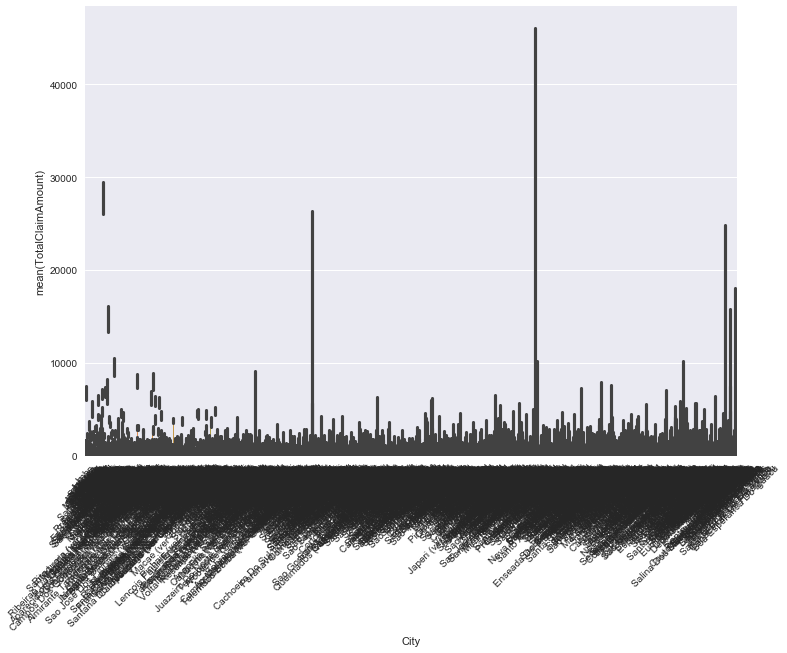

In [19]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.barplot(x="City", y="TotalClaimAmount", data=clean_data,ax=ax1)
for item in ax1.get_xticklabels():
    item.set_rotation(45)

It is hard to see from the figure which cities have higher claim amount but we can still obviosuly see that some cities have much higher total claim amount than the others. Let's find out top 5:

In [20]:
clean_data.groupby('City').sum().TotalClaimAmount.sort_values(ascending=False).head(5)

City
Sao Paulo                             661997202.0
Rio De Janeiro                        245501728.0
Brasilia                              119069715.0
Curitiba (ver Cep Por Logradouros)    113388393.0
Belo Horizonte                        105159987.0
Name: TotalClaimAmount, dtype: float64

Although these cities have the highest total claim amount, it is normally important to see if they have the highest population as well -very likely- or if they have higher crimes rates/accident rates hence making them more susceptible to claims even after controlling for the population. This can easily be checked by making a new variable that is the TotalClaimAmount divided by population (which can be obtained from brazilian_geodata.csv). I am not going to implement it here but it is a reasonable claim to investigate in a real scenario. 

Let's visualize the relationship between VehYear and TotalClaimAmount as well - very likely that the age of the vehicle will affect the number of claims filed as well as the total amount.

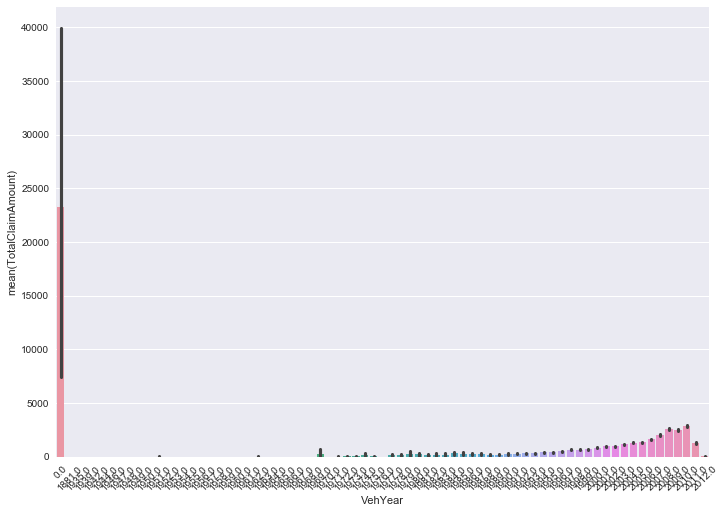

In [21]:
fig, ax2 = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
ax2 = sns.barplot(x="VehYear", y="TotalClaimAmount", data=clean_data,ax=ax2)
for item in ax2.get_xticklabels():
    item.set_rotation(45)

Hmm, it seems like there are some VehYears around zero. Let's check if there are any VehYear values smaller than 1900 for example.

In [22]:
clean_data[clean_data['VehYear']<1900]['VehYear']

393699        0.0
796882        0.0
1333136       0.0
1669185       0.0
1840739       0.0
1960688    1881.0
2453751       0.0
2491568       0.0
Name: VehYear, dtype: float64

Seems like there are some 0 values for VehYear. Let's drop these rows and plot again.

In [23]:
clean_data=clean_data[clean_data['VehYear']>0]

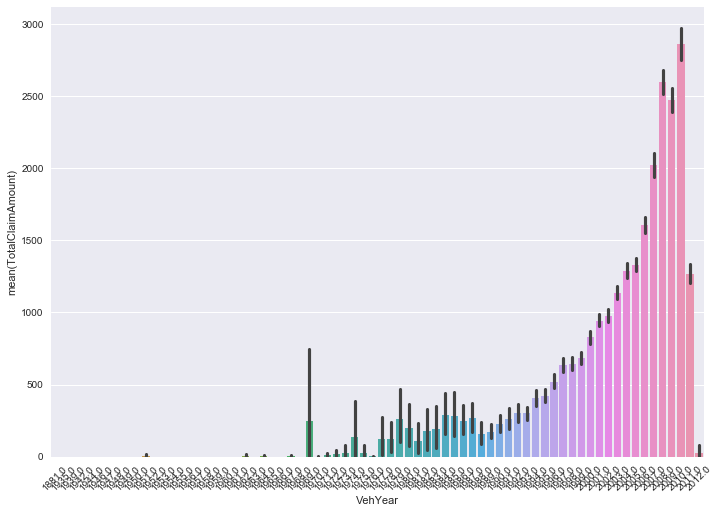

In [24]:
fig, ax2 = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
ax2 = sns.barplot(x="VehYear", y="TotalClaimAmount", data=clean_data,ax=ax2)
for item in ax2.get_xticklabels():
    item.set_rotation(45)

There are too many years in this plot and the bins of VehTime might be more informative than the individual year itself. Let's divide the years into 5 categories for example: year<1980, 1980<=year<1990,1990<=year,2000<=year<2010,year>=2010

In [25]:
clean_data['AgeLevel']=0
clean_data[clean_data['VehYear']<1980]['AgeLevel']=5 #age level 5 -old
clean_data[((1980<=clean_data['VehYear'])&(clean_data['VehYear']<1990))]['AgeLevel']=4 
clean_data[((1990<=clean_data['VehYear'])&(clean_data['VehYear']<2000))]['AgeLevel']=3 
clean_data[((2000<=clean_data['VehYear'])&(clean_data['VehYear']<2010))]['AgeLevel']=2 
clean_data[2010<=clean_data['VehYear']]['AgeLevel']=1 

In [26]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2667745 entries, 0 to 2667751
Data columns (total 20 columns):
VehYear             float64
VehModel            object
VehGroup            object
City                object
Area                object
State               object
StateAb             object
ExposTotal          float64
PremTotal           float64
ClaimNbRob          int64
ClaimNbColl         int64
ClaimNbFire         int64
ClaimNbOther        int64
ClaimAmountRob      float64
ClaimAmountColl     float64
ClaimAmountFire     int64
ClaimAmountOther    int64
TotalClaimNo        int64
TotalClaimAmount    float64
AgeLevel            int64
dtypes: float64(6), int64(8), object(6)
memory usage: 427.4+ MB


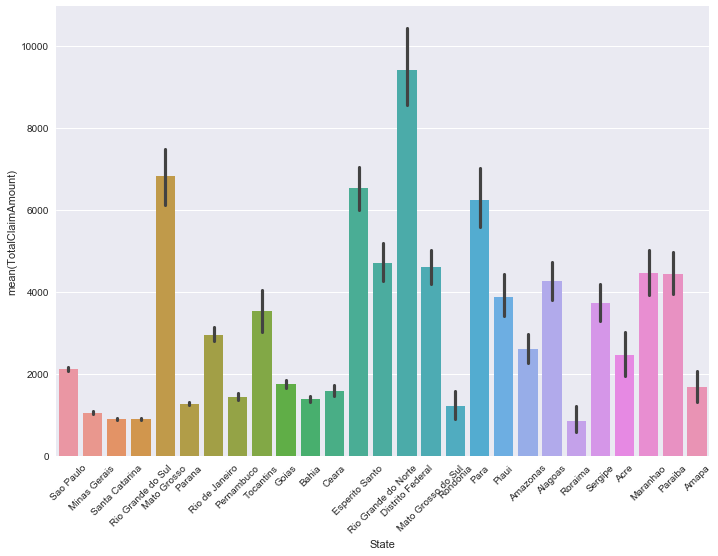

In [27]:
fig, ax3 = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
ax3 = sns.barplot(x="State", y="TotalClaimAmount", data=clean_data,ax=ax3)
for item in ax3.get_xticklabels():
    item.set_rotation(45)

As in City, some states have higher claim amounts than others which might again be related to their population but by pure visual inspection (e.g., Sao Paulo), population of the state does not seem to be the only factor explaining why the claim amount is bigger in some states. We can again correct for population factor by creating a new variable which is the total claim amount divided by the population of the state. I will skip that as well for simplicity.

We can visualize the relationship between different features and TotalClaimNo as well but let's move on to Lasso regression to get a statistical sense of which factors are most important beyond visual inspection.

**3. Prediction **

I will use linear regression with lasso regularization to get a sense of most important features for predicting total claim amount. First, we need to convert all object values into numeric and normalize the data before we can do linear regression. I will convert all objects into numeric first - we could also create dummy variables but in my experience, converting objects into numeric mostly works better.

In [28]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import cross_val_score
from toolz.functoolz import memoize


def get_series_ids(x):
    #function returns a pandas series with the ids of objects
    #in the input series x
    values=np.unique(x)
    values2nums=dict(zip(values,range(len(values))))
    return x.replace(values2nums)

#Let's drop StateAb as it has the same info as State
clean_data.drop(['StateAb'],axis=1,inplace=True)

############# THIS SEEMS TO WORK REALLY SLOW ################
#numVals=memoize(get_series_ids(clean_data.select_dtypes(['object'])))

To speed things up, I am gonna use LabelEncoder

In [29]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(clean_data['VehModel'])
clean_data['VehModelNum']=le.transform(clean_data['VehModel'])

In [30]:
le.fit(clean_data['VehGroup'])
clean_data['VehGroupNum']=le.transform(clean_data['VehGroup'])

In [31]:
le.fit(clean_data['City'])
clean_data['CityNum']=le.transform(clean_data['City'])

In [32]:
le.fit(clean_data['Area'])
clean_data['AreaNum']=le.transform(clean_data['Area'])

In [33]:
le.fit(clean_data['State'])
clean_data['StateNum']=le.transform(clean_data['State'])

Let's drop the object values and check the data again.

In [34]:
#let's drop the object values
clean_data.drop(['VehModel'],axis=1,inplace=True)
clean_data.drop(['VehGroup'],axis=1,inplace=True)
clean_data.drop(['City'],axis=1,inplace=True)
clean_data.drop(['Area'],axis=1,inplace=True)
clean_data.drop(['State'],axis=1,inplace=True)


In [35]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2667745 entries, 0 to 2667751
Data columns (total 19 columns):
VehYear             float64
ExposTotal          float64
PremTotal           float64
ClaimNbRob          int64
ClaimNbColl         int64
ClaimNbFire         int64
ClaimNbOther        int64
ClaimAmountRob      float64
ClaimAmountColl     float64
ClaimAmountFire     int64
ClaimAmountOther    int64
TotalClaimNo        int64
TotalClaimAmount    float64
AgeLevel            int64
VehModelNum         int64
VehGroupNum         int64
CityNum             int64
AreaNum             int64
StateNum            int64
dtypes: float64(6), int64(13)
memory usage: 407.1 MB


Looks like all data points are numeric now. We can go ahead and 1) divide the data into training and test sets, 2) normalize it, 3) do linear regression with Lasso regularization to see which features are most important in terms of predicting TotalClaimAmount.

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#let's divide the data set into test and training sets
#first, let's predict TotalClaimAmount
y=clean_data['TotalClaimAmount']
X=clean_data.drop(['TotalClaimAmount'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#Scale the data
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

#do the prediction with Lasso with Least Angle Regression
lars_reg=LassoCV(alphas = np.linspace(0.05, 50, num=100)).fit(X_test, y_test)
lars_reg.fit(X_train,y_train)
print(lars_reg.coef_)

[  0.00000000e+00  -3.82901145e+00  -2.09446440e+00   4.17053142e+02
   3.59621280e+03   3.20537724e+01   1.03993775e+04   9.32980095e+03
   1.05917496e+04   1.05226121e+03   2.44615141e+03  -1.22259936e+04
   0.00000000e+00  -0.00000000e+00  -0.00000000e+00   0.00000000e+00
  -0.00000000e+00  -0.00000000e+00]


Lasso picked 11 variables and eliminated the other 7 variables


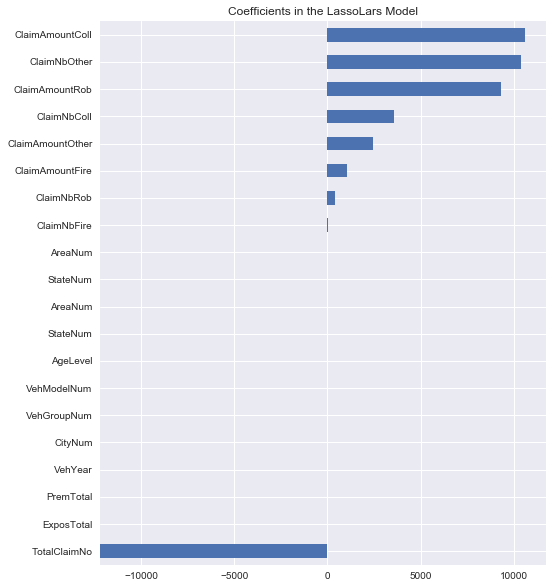

In [37]:
coef = pd.Series(lars_reg.coef_, index = clean_data.drop(['TotalClaimAmount'],axis=1).columns)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")


imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

%matplotlib inline
import matplotlib.pyplot as plt   
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the LassoLars Model")

One thing I should have checked before doing the regression was the collinearity between variables. Clearly, number of claims and claim amount are correlated. Let's visualize the collinearity in the dataset first. 

In [38]:
#import seaborn as sns
#f, ax = plt.subplots(figsize=(15, 12))
#sns.heatmap(clean_data).corr();

This was very slow to execute unfortunately. So, I will skip that and instead try to see if State, Area, VehModel, City are latent variables that might be picked up by Lasso if I drop features related to claim amount or number.

In [39]:
clean_data.drop(['ClaimAmountColl'],axis=1,inplace=True)
clean_data.drop(['ClaimNbOther'],axis=1,inplace=True)
clean_data.drop(['ClaimAmountRob'],axis=1,inplace=True)
clean_data.drop(['ClaimNbColl'],axis=1,inplace=True)
clean_data.drop(['ClaimAmountOther'],axis=1,inplace=True)
clean_data.drop(['ClaimAmountFire'],axis=1,inplace=True)
clean_data.drop(['ClaimNbRob'],axis=1,inplace=True)
clean_data.drop(['ClaimNbFire'],axis=1,inplace=True)

In [40]:
clean_data.drop(['TotalClaimNo'],axis=1,inplace=True)

In [41]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2667745 entries, 0 to 2667751
Data columns (total 10 columns):
VehYear             float64
ExposTotal          float64
PremTotal           float64
TotalClaimAmount    float64
AgeLevel            int64
VehModelNum         int64
VehGroupNum         int64
CityNum             int64
AreaNum             int64
StateNum            int64
dtypes: float64(4), int64(6)
memory usage: 223.9 MB


Let's do a new prediction without the amount and claim number features.

In [42]:
#let's divide the data set into test and training sets again
#first, let's predict TotalClaimAmount
y=clean_data['TotalClaimAmount']
X=clean_data.drop(['TotalClaimAmount'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#Scale the data
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

#do the prediction with Lasso with Least Angle Regression
lars_reg=LassoCV(alphas = np.linspace(0.05, 50, num=100)).fit(X_test, y_test)
lars_reg.fit(X_train,y_train)
print(lars_reg.coef_)

[    53.06337587    888.46459281  14845.39546784      0.            317.4282589
   -284.26558196    -29.73304434    -33.08624105     50.4824938 ]


Lasso picked 8 variables and eliminated the other 1 variables


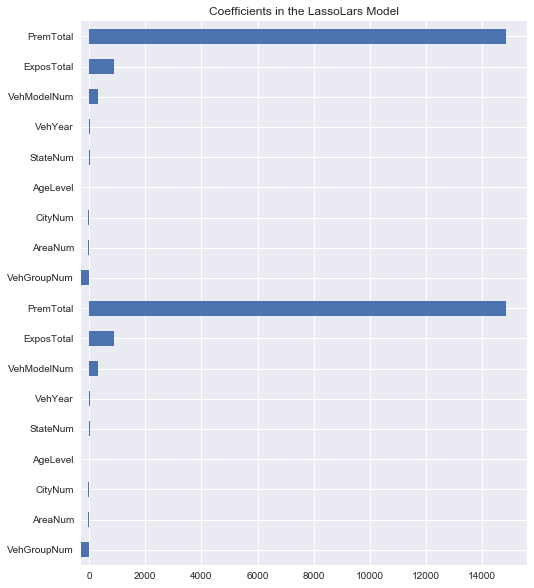

In [43]:
coef = pd.Series(lars_reg.coef_, index = clean_data.drop(['TotalClaimAmount'],axis=1).columns)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")


imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

%matplotlib inline
import matplotlib.pyplot as plt   
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the LassoLars Model")

It looks like total premium and exposure (again probably correlated with Total Claim Amount) and vehichle model and group seem to be given more weight by linear regression with lasso regularization indicating we should focus our analysis more on these features. But I will stop here and draw some conclusions based on what we have so far.

** 4. Conclusion **

Based on the analysis done so far, we can see that the total amount of claim the company gets depends on factors like state, the model and group of the vehicle. Furthermore, the company seems to get more claims for collision and robery than fire for example. 

There is a lot more to be explored though. I tried to stick to the time constraints (~4h) but given more time, I would do logistic regression to see which factors contribute to whether a claim will be filed or not. I would also try to do linear regression using Lasso regularization on the number of claims to see which factors are more important to predict the number of claims. 

Another thing that would be interesting is to predict whether files will be claimed for the newer vehicles based on the insights we get from Lasso. We can try to create other predictive models. Vehicle model could also be extrapolated better by extracting the name of the brand using nltk toolbox for example and adding another variable for the model. 